In [ ]:
pip install scikit-learn

In [ ]:
pip install polars

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
# import dask.dataframe as dd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_labels=pd.read_csv("drive/My Drive/AML Project/train_labels.csv")

In [ ]:
train_labels.head()

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0


In [ ]:
train_labels = train_labels.sample(frac=0.2, random_state=16)


In [ ]:
train_labels.shape

(91783, 2)

In [ ]:
print(train_labels.head())

                                              customer_ID  target
77542   2b51688aee0f7f5812fa153ca8761f0d7521cbf6d7a659...       0
98937   370e88e9f99ecae975fc695291b370e29af30336ecb20c...       0
283660  9def29ad686dfc1ab7e967f7146ec794bdbc96113cc8c2...       0
179605  641af8b5a16a199a345ae8170a28cf1dcf8528a7eaebe0...       0
119688  4284fbe271bf3175ff040a34c0c2f8bab172b841addc34...       0


In [ ]:
train_data = pd.read_csv("drive/My Drive/AML Project/train_data.csv")

In [ ]:
train_data.shape

(5531451, 190)

In [ ]:
development_sample = pd.merge(train_labels, train_data, on='customer_ID', how='inner')

In [ ]:
development_sample.head()

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,2b51688aee0f7f5812fa153ca8761f0d7521cbf6d7a659...,0,2017-03-04,0.917958,0.003306,0.008531,0.812741,0.008496,NaN,0.007855,...,NaN,NaN,NaN,0.001856,0.003048,0.003504,NaN,0.004167,0.007788,0.008280
1,2b51688aee0f7f5812fa153ca8761f0d7521cbf6d7a659...,0,2017-04-04,0.921627,0.003776,0.000845,0.813486,0.001033,NaN,0.005105,...,NaN,NaN,NaN,0.007862,0.000104,0.008506,NaN,0.005092,0.000966,0.004479
2,2b51688aee0f7f5812fa153ca8761f0d7521cbf6d7a659...,0,2017-05-04,0.933776,0.004473,0.008126,0.811686,0.002613,NaN,0.003293,...,NaN,NaN,NaN,0.007389,0.002904,0.003629,NaN,0.000073,0.001454,0.004611
3,2b51688aee0f7f5812fa153ca8761f0d7521cbf6d7a659...,0,2017-06-03,0.930649,0.009011,0.008174,0.810701,0.004875,NaN,0.001579,...,NaN,NaN,NaN,0.002716,0.004051,0.002354,NaN,0.006567,0.007554,0.004305
4,2b51688aee0f7f5812fa153ca8761f0d7521cbf6d7a659...,0,2017-07-04,0.961892,0.000147,0.008458,0.818389,0.002612,NaN,0.004259,...,NaN,NaN,NaN,0.005050,0.007405,0.009461,NaN,0.000240,0.009238,0.005281


In [ ]:
development_sample.describe()

,target,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
count,1.106435e+06,1.097052e+06,1.106435e+06,1.106435e+06,1.106025e+06,1.106435e+06,901775.000000,1.106025e+06,1.106025e+06,158503.000000,...,3.970200e+04,3.970200e+04,39702.000000,1.086003e+06,1.098157e+06,1.086003e+06,186709.000000,1.086003e+06,1.098156e+06,1.086003e+06
mean,2.505018e-01,6.568783e-01,1.536941e-01,1.245354e-01,6.220556e-01,7.850800e-02,0.226492,5.956207e-02,1.333328e-01,0.185400,...,2.450655e-01,1.450659e-02,0.163008,1.769256e-01,2.671294e-02,1.626092e-01,0.390941,1.768581e-01,5.119737e-02,6.257811e-02
std,4.333022e-01,2.440624e-01,2.705969e-01,2.129896e-01,4.017798e-01,2.256520e-01,0.194633,2.028231e-01,2.366358e-01,0.229671,...,2.142215e-01,9.703173e-02,0.263678,3.773255e-01,1.457728e-01,3.465200e-01,0.238068,3.772699e-01,1.800921e-01,1.965696e-01
min,0.000000e+00,-4.210819e-01,5.957676e-09,-7.588799e+00,3.419474e-07,1.534223e-09,-0.627132,3.440668e-09,1.463649e-08,-0.000327,...,6.882692e-07,4.274578e-07,0.000001,2.124825e-08,2.158847e-08,7.876479e-09,-0.014539,5.549692e-09,2.500991e-09,2.811854e-09
25%,0.000000e+00,4.808518e-01,4.542168e-03,8.862909e-03,1.043637e-01,2.902260e-03,0.127202,2.868541e-03,5.219804e-03,0.037104,...,9.323319e-03,2.536981e-03,0.003477,3.017836e-03,2.557489e-03,3.021966e-03,0.196530,3.019566e-03,2.747842e-03,3.021798e-03
50%,0.000000e+00,6.944109e-01,9.086077e-03,3.135026e-02,8.143729e-01,5.792664e-03,0.163814,5.745201e-03,9.757751e-03,0.121014,...,2.539867e-01,5.082094e-03,0.006971,6.042172e-03,5.112280e-03,6.041286e-03,0.383466,6.034710e-03,5.497652e-03,6.032739e-03
75%,1.000000e+00,8.650992e-01,2.372057e-01,1.264217e-01,1.002435e+00,8.665231e-03,0.259322,8.615476e-03,1.550449e-01,0.251334,...,2.583026e-01,7.599298e-03,0.501454,9.060094e-03,7.666157e-03,9.060367e-03,0.558248,9.055350e-03,8.245504e-03,9.059849e-03
max,1.000000e+00,1.009999e+00,5.362196e+00,1.324059e+00,1.010000e+00,3.256284e+00,4.437958,7.481695e+00,1.540823e+00,4.191119,...,1.759600e+00,1.009998e+00,2.009973,1.010000e+00,1.009999e+00,1.236538e+00,2.091407,1.010000e+00,1.343327e+00,4.827630e+00


In [ ]:
development_sample = development_sample.with_columns(
    pl.col('S_2').str.strptime(pl.Date, '%Y-%m-%d')
)


AttributeError: 'DataFrame' object has no attribute 'with_columns'

In [ ]:
development_sample.shape

In [ ]:
development_sample = pl.read_csv("drive/My Drive/AML Project/development_sample")

In [ ]:
# Count the number of occurrences for each customer ID
customer_month_counts = development_sample.group_by('customer_ID').agg(
    months_of_data=pl.len()
)
# Merge this count back with the original dataframe to get the target variable for each customer
development_sample = development_sample.join(customer_month_counts, on='customer_ID')

In [ ]:
print(development_sample.head())

In [ ]:
# Group by the number of months of data and calculate the number of unique customer IDs and default rate
summary_table = development_sample.group_by('months_of_data').agg(
    Number_of_Observations=pl.col('customer_ID').n_unique(),
    Default_Rate=pl.col('target').mean()
).sort('months_of_data')

# Convert the summary table to a pandas DataFrame for display
summary_table_df = summary_table.to_pandas()

summary_table_df = summary_table_df.sort_values(by='months_of_data', ascending=False)

# Display the summary table
print(summary_table_df)

In [ ]:
# Count the number of features in each category
categories = {
    'D_': 'Delinquency variables',
    'S_': 'Spend variables',
    'P_': 'Payment variables',
    'B_': 'Balance variables',
    'R_': 'Risk variables'
}

feature_counts = []
for prefix, category in categories.items():
    count = sum(feature.startswith(prefix) for feature in development_sample.columns)
    feature_counts.append({'Category': category, '# of features': count})

# Convert the list to a Pandas DataFrame
feature_counts_df = pd.DataFrame(feature_counts)

# Display the table
print(feature_counts_df)

                Category  # of features
0  Delinquency variables             96
1        Spend variables             22
2      Payment variables              3
3      Balance variables             40
4         Risk variables             28


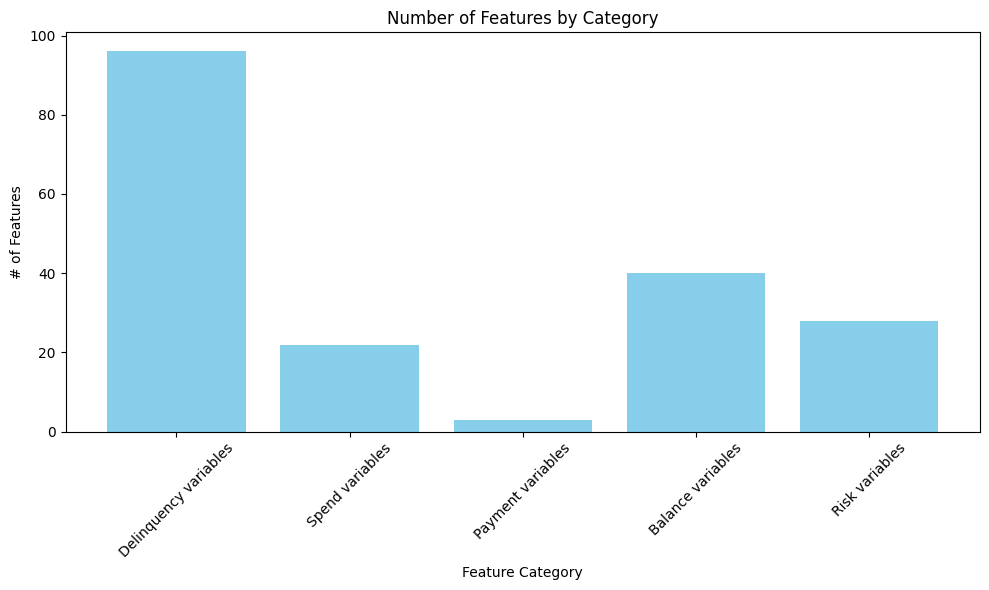

In [ ]:
import matplotlib.pyplot as plt

# Plotting the feature counts
plt.figure(figsize=(10, 6))
plt.bar(feature_counts_df['Category'], feature_counts_df['# of features'], color='skyblue')

# Adding labels and title
plt.xlabel('Feature Category')
plt.ylabel('# of Features')
plt.title('Number of Features by Category')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
categorical_columns = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

all_columns = [c for c in list(development_sample.columns) if c not in ['customer_ID','S_2']]

continuous_columns = [col for col in all_columns if col not in categorical_columns + ['target']]

In [ ]:
for col in continuous_columns:
    development_sample[col] = development_sample[col].astype('float64')

In [ ]:
import pandas as pd

import pandas as pd

# Define the reference date (most recent date)
reference_date = pd.Timestamp('2018-04-30')

# Define a function to create aggregated features
def create_aggregated_features(df, feature, months, reference_date):
    # Convert the 'S_2' column to datetime format if it's not already
    df['S_2'] = pd.to_datetime(df['S_2'], errors='coerce')  # 'coerce' will turn invalid dates into NaT (missing values)

    # Filter the DataFrame to include only the last 'months' months
    filtered_df = df[df['S_2'] >= (reference_date - pd.DateOffset(months=months))]

    # Group by 'customer_ID' and calculate aggregated features
    agg_df = filtered_df.groupby('customer_ID').agg({
        feature: [
            ('mean', 'mean'),
            ('min', 'min'),
            ('max', 'max')
        ]
    })

    # Flatten the column names
    agg_df.columns = [f"{feature}_Ave_{months}", f"{feature}_Min_{months}", f"{feature}_Max_{months}"]

    return agg_df.reset_index()

# Define the list of numerical features for which you want to create aggregated features
numerical_features = continuous_columns  # Assuming 'continuous_columns' contains the list of numerical features

# Initialize an empty list to store the feature DataFrames
feature_dfs = []

# Iterate over the numerical features and create aggregated features for different time periods
for feature in numerical_features:
    for months in [6, 12]:  # Specify the time periods you want to aggregate over
        feature_df = create_aggregated_features(development_sample, feature, months, reference_date)
        feature_dfs.append(feature_df)

# Optionally, concatenate all feature DataFrames into one final DataFrame
final_features_df = pd.concat(feature_dfs, axis=1)

# Remove duplicate 'customer_ID' columns from concatenation
final_features_df = final_features_df.loc[:, ~final_features_df.columns.duplicated()]


In [ ]:
# Initialize an empty list to store the feature DataFrames
feature_dfs = []

# Iterate over the numerical features and create aggregated features for different time periods
for feature in continuous_columns:
    for months in [6, 12]:  # Specify the time periods you want to aggregate over
        feature_df = create_aggregated_features(development_sample, feature, months, reference_date)
        # Keep 'customer_ID' only in the first DataFrame
        if feature_dfs:
            feature_df = feature_df.drop(columns=['customer_ID'])
        feature_dfs.append(feature_df)

# Combine all aggregated feature DataFrames into a single DataFrame (axis=1 for horizontal concat)
final_features_df = pd.concat(feature_dfs, axis=1)

# Add 'customer_ID' back to the final DataFrame
final_features_df = pd.concat([feature_dfs[0][['customer_ID']], final_features_df], axis=1)


In [ ]:
df_cat = development_sample[categorical_columns + ['customer_ID', 'S_2']]

Convert categorical variables to dummy variables with One hot encoding using
Polars library

In [ ]:
df_cat = pd.get_dummies(df_cat, columns=categorical_columns)


In [ ]:


import pandas as pd

# Define a helper function to create aggregated features for binary categorical features
def create_categorical_aggregated_features(df, feature, months, reference_date):
    # Convert 'S_2' to datetime if necessary
    df['S_2'] = pd.to_datetime(df['S_2'], errors='coerce')

    # Filter the DataFrame to include only the last 'months' months
    filtered_df = df[df['S_2'] >= (reference_date - pd.DateOffset(months=months))]

    # Group by 'customer_ID' and aggregate the feature
    agg_df = filtered_df.groupby('customer_ID').agg(
        Response_Rate=(feature, lambda x: x.sum() / len(x)),
        Ever_Response=(feature, lambda x: 1 if x.sum() > 0 else 0)
    )

    # Rename columns to match your desired format
    agg_df.columns = [f"{feature}_Response_Rate_{months}", f"{feature}_Ever_Response_{months}"]

    return agg_df.reset_index()

# Initialize a list to store the feature DataFrames
cat_feature_dfs = []

# Iterate over the categorical columns and create aggregated features
for feature in df_cat.columns:
    if feature in ['customer_ID', 'S_2']:
        continue
    for months in [6, 12]:
        cat_feature_dfs.append(create_categorical_aggregated_features(df_cat, feature, months, reference_date))

# Ensure that 'customer_ID' exists in each DataFrame and align them correctly
cat_feature_dfs_aligned = [cat_feature_dfs[0]]  # Start with the first DataFrame that includes 'customer_ID'

# Remove 'customer_ID' from the rest and align them horizontally
for i in range(1, len(cat_feature_dfs)):
    df = cat_feature_dfs[i].drop(columns=['customer_ID'])  # Drop 'customer_ID' only from subsequent DataFrames
    cat_feature_dfs_aligned.append(df)

# Concatenate all DataFrames horizontally
final_cat_df = pd.concat(cat_feature_dfs_aligned, axis=1)

# Display or print the final dataframe
print(final_cat_df)


                                             customer_ID  \
0      00001b22f846c82c51f6e3958ccd81970162bae8b007e8...   
1      000041bdba6ecadd89a52d11886e8eaaec9325906c9723...   
2      000084e5023181993c2e1b665ac88dbb1ce9ef621ec537...   
3      000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...   
4      0000f99513770170a1aba690daeeb8a96da4a39f11fc27...   
...                                                  ...   
91778  fffb1641cf36f09a91daf551b8f9d8bfece9fa055b6f60...   
91779  fffb6886e0bfbb9bb719d153a1e41a780d107fc9190d0e...   
91780  fffcae1af226772f35143cd002489b2c99a0f4acdd5932...   
91781  fffe39594fad367d9eb8ae18537b56b0739c4cc3ab9810...   
91782  fffe6355ed80789ab8c3ba18a4d10acc52964106ae7b98...   

       B_30_0.0_Response_Rate_6  B_30_0.0_Ever_Response_6  \
0                           1.0                         1   
1                           1.0                         1   
2                           1.0                         1   
3                           0.6    

In [ ]:
# Step 1: Concatenate the final features and final categorical data, excluding 'customer_ID' from final_cat_df
combined_df = pd.concat([final_features_df, final_cat_df.drop(columns=['customer_ID'])], axis=1)

# Step 2: Select 'customer_ID', 'S_2', 'target', and continuous columns from development_sample
selected_columns = ['customer_ID', 'S_2', 'target'] + continuous_columns
development_sample_grouped = development_sample[selected_columns].groupby('customer_ID').first().reset_index()

# Step 3: Drop 'customer_ID' from the grouped data
development_sample_grouped = development_sample_grouped.drop(columns=['customer_ID'])

# Step 4: Concatenate everything horizontally
dataset = pd.concat([combined_df, development_sample_grouped], axis=1)

In [ ]:
dataset.shape

(91783, 1423)

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.impute import SimpleImputer

In [ ]:
# Step 1: Remove duplicate columns
dataset = dataset.loc[:, ~dataset.columns.duplicated()]

# Step 2: Verify that 'customer_ID' and 'target' exist without duplicates
print(dataset.columns)

# Step 3: Proceed with train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop(['customer_ID', 'target'], axis=1),  # Drop 'customer_ID' and 'target' from features
    dataset['target'],  # Use 'target' column for labels
    test_size=0.3,  # 30% of data for testing, 70% for training
    random_state=6  # Ensure reproducibility
)

# Check the resulting splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Index(['customer_ID', 'P_2_Ave_6', 'P_2_Min_6', 'P_2_Max_6', 'P_2_Ave_12',
       'P_2_Min_12', 'P_2_Max_12', 'D_39_Ave_6', 'D_39_Min_6', 'D_39_Max_6',
       ...
       'D_136', 'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143',
       'D_144', 'D_145'],
      dtype='object', length=1422)
(64248, 1420) (27535, 1420) (64248,) (27535,)


In [ ]:
# Step 1: Separate numeric and datetime columns
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
datetime_columns = X_train.select_dtypes(include=['datetime64']).columns

# Step 2: Impute missing values for numeric columns
imputer = SimpleImputer(strategy='constant', fill_value=np.nan)

# Impute the numeric columns in both train and test sets
X_train_numeric_imputed = imputer.fit_transform(X_train[numeric_columns])
X_test_numeric_imputed = imputer.transform(X_test[numeric_columns])

# Step 3: Convert the imputed numeric arrays back to DataFrames
X_train_numeric_imputed = pd.DataFrame(X_train_numeric_imputed, columns=numeric_columns)
X_test_numeric_imputed = pd.DataFrame(X_test_numeric_imputed, columns=numeric_columns)

# Step 4: Combine imputed numeric columns with datetime columns (unchanged)
X_train_imputed = pd.concat([X_train_numeric_imputed, X_train[datetime_columns].reset_index(drop=True)], axis=1)
X_test_imputed = pd.concat([X_test_numeric_imputed, X_test[datetime_columns].reset_index(drop=True)], axis=1)

# Display the imputed training data
print(X_train_imputed.head())
print(X_test_imputed.head())

   P_2_Ave_6  P_2_Min_6  P_2_Max_6  P_2_Ave_12  P_2_Min_12  P_2_Max_12  \
0   0.210188   0.167181   0.235248    0.206041    0.167181    0.235248   
1   0.389474   0.313002   0.460255    0.359086    0.292678    0.460255   
2   0.604565   0.571759   0.628890    0.581633    0.538525    0.628890   
3   0.595958   0.548319   0.686656    0.555369    0.472060    0.686656   
4   0.876619   0.873287   0.883849    0.882474    0.856565    0.930719   

   D_39_Ave_6  D_39_Min_6  D_39_Max_6  D_39_Ave_12  ...     D_137     D_138  \
0    0.069895    0.002480    0.240489     0.136103  ...       NaN       NaN   
1    0.051163    0.001407    0.235566     0.031052  ...  0.006355  0.500328   
2    0.146119    0.000620    0.411904     0.100538  ...       NaN       NaN   
3    0.003722    0.001088    0.008505     0.084288  ...       NaN       NaN   
4    0.006955    0.001405    0.009393     0.005304  ...       NaN       NaN   

      D_139     D_140     D_141     D_142     D_143     D_144     D_145  \
0  0.

In [ ]:
print(X_test['S_2'])

77161   2017-03-10
58906   2017-03-12
57732   2017-03-23
41073   2017-03-20
83007   2017-03-14
           ...    
11229   2017-03-11
12873   2017-03-31
14226   2017-03-18
16483   2017-03-18
35927   2017-03-23
Name: S_2, Length: 27535, dtype: datetime64[ns]


In [ ]:
X_test_1, X_test_2, y_test_1, y_test_2 = train_test_split(X_test_imputed, y_test, test_size = 0.5, random_state = 6)

In [ ]:
for column in X_train_imputed.columns:
    X_train_imputed[column] = pd.to_numeric(X_train_imputed[column], errors='coerce')

In [ ]:
X_train_imputed.fillna(X_train_imputed.mean(), inplace=True)


In [ ]:
classifier = xgb.XGBClassifier(seed=6)
classifier.fit(X_train_imputed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
classifier.feature_importances_

array([0.10432225, 0.09533153, 0.01021449, ..., 0.00058772, 0.00045543,
       0.00045011], dtype=float32)

In [ ]:
# Step 1: Get feature importances
feature_importances = {key: value for key, value in zip(dataset.drop(['customer_ID', 'target'], axis=1).columns, classifier.feature_importances_)}

# Step 2: Filter features with importance higher than 0.5% (0.005)
important_features = {k: v for k, v in feature_importances.items() if v > 0.005}

# Step 3: Save the important features to a DataFrame
importance_df = pd.DataFrame.from_dict(important_features, orient='index', columns=['Importance'])

# Step 4: Reset the index to make 'Feature' a column
importance_df = importance_df.reset_index().rename(columns={'index': 'Feature'})

# Step 5: Save the DataFrame to a CSV file
importance_df.to_csv('important_features.csv', index=False)

# Display the DataFrame with important features
print(importance_df.head(8))

     Feature  Importance
0  P_2_Ave_6    0.104322
1  P_2_Min_6    0.095332
2  P_2_Max_6    0.010214
3  B_1_Ave_6    0.017762
4  B_1_Max_6    0.005894
5  B_2_Min_6    0.012986
6  R_1_Ave_6    0.008630
7  R_1_Max_6    0.007742


In [ ]:
from google.colab import files

# Step 5: Save the DataFrame to a CSV file
importance_df.to_csv('important_features.csv', index=False)

# Download the file to your local machine
files.download('important_features.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
##### Train the XGBoost classifier with specified parameters
classifier = xgb.XGBClassifier(n_estimators=300, learning_rate=0.5, max_depth=4, subsample=0.5, colsample_bytree=0.5, scale_pos_weight=5, seed=6)
classifier.fit(X_train_imputed, y_train)

# Get feature importances
feature_importances = {key: value for key, value in zip(X_train.columns, classifier.feature_importances_)}

# Filter features with importance higher than 0.5%
important_features_2 = {k: v for k, v in feature_importances.items() if v > 0.005}

# Save the feature importances to a CSV file
importance_csv_2 = pd.DataFrame.from_dict(important_features_2, orient='index', columns=['Importance'])
files.download('important_features_2.csv')

In [ ]:
# Save the file to CSV
importance_csv_2.to_csv('important_features_2.csv', index=False)

# Download the CSV file
files.download('important_features_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(importance_csv_2.head(10))

             Importance
P_2_Ave_6      0.077396
P_2_Min_6      0.028945
P_2_Max_6      0.007142
B_1_Ave_12     0.036157
R_1_Max_6      0.007628
S_3_Ave_6      0.006004
D_45_Max_12    0.005925
D_48_Max_6     0.006740
B_7_Ave_6      0.010685
B_9_Max_6      0.044567


In [ ]:
combined_important_features = list(set(important_features.keys()) | set(important_features_2.keys()))

In [ ]:
print(combined_important_features)

['D_48_Max_6', 'P_2_Max_6', 'B_2_Min_6', 'B_22_Max_6', 'B_18_Min_6', 'B_11_Ave_6', 'R_1_Max_6', 'B_22_Ave_6', 'B_7_Ave_6', 'B_9_Max_6', 'B_1_Max_6', 'D_45_Max_12', 'S_3_Ave_6', 'P_2_Ave_6', 'P_2_Min_6', 'D_44_Max_6', 'R_1_Ave_6', 'D_46_Ave_12', 'D_42_Min_12', 'B_1_Ave_12', 'B_1_Ave_6']


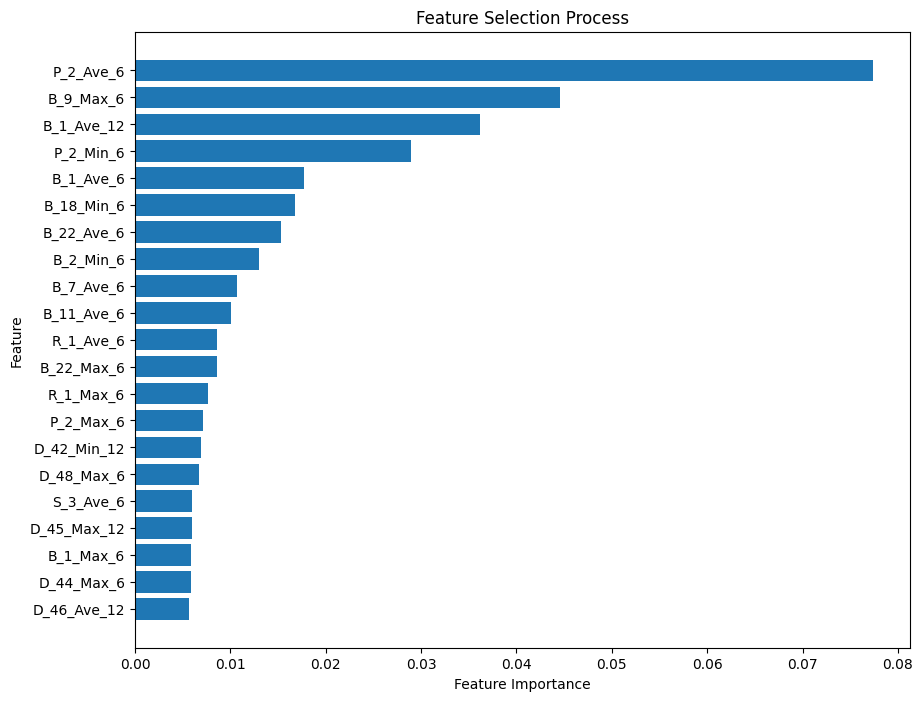

In [ ]:
# Combine the feature importances from both models
all_feature_importances = {**important_features, **important_features_2}

# Sort the features by their importance
sorted_features = sorted(all_feature_importances.items(), key=lambda x: x[1], reverse=True)

# Separate the feature names and their importances
feature_names, importances = zip(*sorted_features)

# Create a bar plot
plt.figure(figsize=(10, 8))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Selection Process')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [ ]:
for column in X_test_1.columns:
    X_test_1[column] = pd.to_numeric(X_test_1[column], errors='coerce')

In [ ]:
for column in X_test_2.columns:
    X_test_2[column] = pd.to_numeric(X_test_2[column], errors='coerce')


In [ ]:
# Define the parameter grid with your specified parameters
param_grid = {
    'n_estimators': [50, 100, 300],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.5, 0.8],
    'colsample_bytree': [0.5, 1.0],
    'scale_pos_weight': [1, 5, 10]
}

# Create an empty list to store the results
results = []

# Iterate through each combination of parameters
for n_estimators in param_grid['n_estimators']:
    for learning_rate in param_grid['learning_rate']:
        for subsample in param_grid['subsample']:
            for colsample_bytree in param_grid['colsample_bytree']:
                for scale_pos_weight in param_grid['scale_pos_weight']:
                    # Train a model with the current combination of parameters
                    model = xgb.XGBClassifier(
                        n_estimators=n_estimators,
                        learning_rate=learning_rate,
                        subsample=subsample,
                        colsample_bytree=colsample_bytree,
                        scale_pos_weight=scale_pos_weight,
                        random_state=42
                    )
                    model.fit(X_train[combined_important_features], y_train)

                    # Compute AUC scores on Train and Test datasets
                    auc_train = roc_auc_score(y_train, model.predict_proba(X_train[combined_important_features])[:, 1])
                    auc_test1 = roc_auc_score(y_test_1, model.predict_proba(X_test_1[combined_important_features])[:, 1])
                    auc_test2 = roc_auc_score(y_test_2, model.predict_proba(X_test_2[combined_important_features])[:, 1])

                    # Append the results to the list
                    results.append({
                        'Number of Trees': n_estimators,
                        'Learning Rate': learning_rate,
                        'Subsample': subsample,
                        'Percentage of Features': colsample_bytree * 100,
                        'Weight of Default': scale_pos_weight,
                        'AUC Train': auc_train,
                        'AUC Test 1': auc_test1,
                        'AUC Test 2': auc_test2
                    })

# Convert the list of results to a DataFrame
results_df = pd.DataFrame(results)
print(results_df)


    Number of Trees  Learning Rate  Subsample  Percentage of Features  \
0                50           0.01        0.5                    50.0   
1                50           0.01        0.5                    50.0   
2                50           0.01        0.5                    50.0   
3                50           0.01        0.5                   100.0   
4                50           0.01        0.5                   100.0   
..              ...            ...        ...                     ...   
67              300           0.10        0.8                    50.0   
68              300           0.10        0.8                    50.0   
69              300           0.10        0.8                   100.0   
70              300           0.10        0.8                   100.0   
71              300           0.10        0.8                   100.0   

    Weight of Default  AUC Train  AUC Test 1  AUC Test 2  
0                   1   0.945936    0.936802    0.939120  
1    

In [ ]:
# Sort the results by AUC Test 1 and AUC Test 2 (descending order)
sorted_results_df = results_df.sort_values(by=['AUC Test 1', 'AUC Test 2'], ascending=False)

# Print the sorted table
print(sorted_results_df)

# Select the top row as the best model
best_model_row = sorted_results_df.iloc[0]
print("Best model parameters:")
print(best_model_row)

    Number of Trees  Learning Rate  Subsample  Percentage of Features  \
45              100           0.10        0.8                   100.0   
42              100           0.10        0.8                    50.0   
69              300           0.10        0.8                   100.0   
36              100           0.10        0.5                    50.0   
46              100           0.10        0.8                   100.0   
..              ...            ...        ...                     ...   
8                50           0.01        0.8                    50.0   
10               50           0.01        0.8                   100.0   
2                50           0.01        0.5                    50.0   
5                50           0.01        0.5                   100.0   
11               50           0.01        0.8                   100.0   

    Weight of Default  AUC Train  AUC Test 1  AUC Test 2  
45                  1   0.963849    0.942324    0.943919  
42   

In [ ]:
# Assuming best_model_row contains the best parameters
optimum_params = {
    'n_estimators': int(best_model_row['Number of Trees']),
    'learning_rate': best_model_row['Learning Rate'],
    'subsample': best_model_row['Subsample'],
    'colsample_bytree': best_model_row['Percentage of Features'] / 100,
    'scale_pos_weight': best_model_row['Weight of Default'],
    'random_state': 42
}

# Re-train the model with the optimum parameters
final_model_xgb = xgb.XGBClassifier(**optimum_params)
final_model_xgb.fit(X_train[combined_important_features], y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Save the final model
import joblib
joblib.dump(final_model_xgb, 'final_model_xgb.joblib')
from google.colab import files
files.download('final_model_xgb.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(optimum_params)

{'n_estimators': 100, 'learning_rate': 0.1, 'subsample': 0.8, 'colsample_bytree': 1.0, 'scale_pos_weight': 1.0, 'random_state': 42}


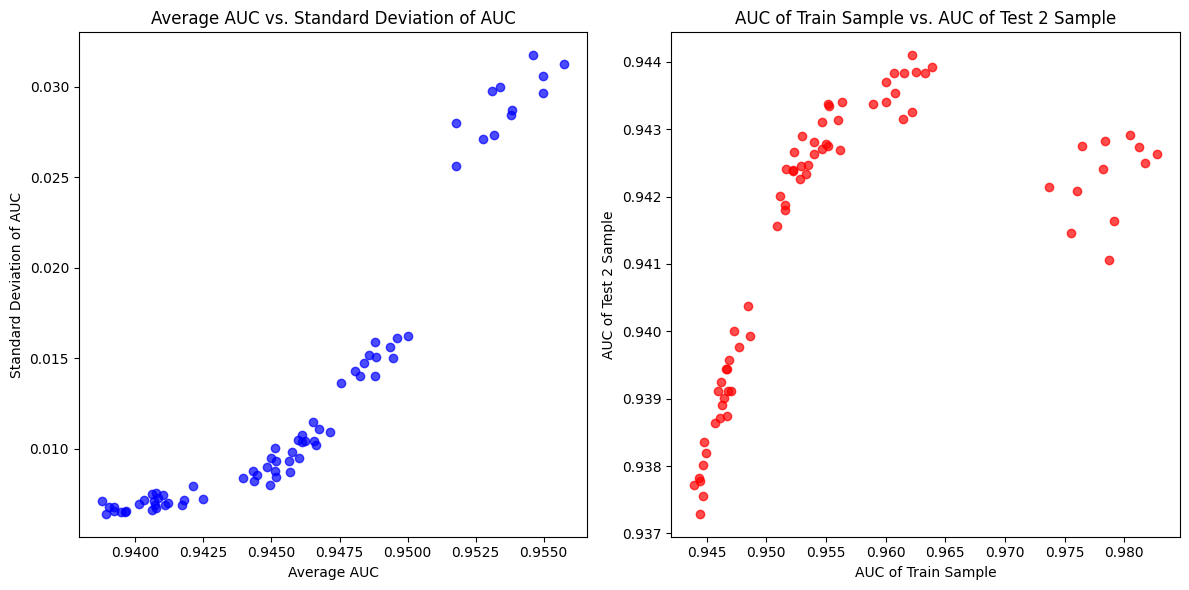

In [ ]:
# Calculate average and standard deviation of AUC across three samples for each model
avg_auc = []
std_auc = []
auc_train = []
auc_test2 = []

for idx, row in sorted_results_df.iterrows():
    auc_train.append(row['AUC Train'])
    auc_test2.append(row['AUC Test 2'])

    avg = (row['AUC Train'] + row['AUC Test 1'] + row['AUC Test 2']) / 3
    avg_auc.append(avg)
    std = ((row['AUC Train'] - avg)**2 + (row['AUC Test 1'] - avg)**2 + (row['AUC Test 2'] - avg)**2 / 3)**0.5
    std_auc.append(std)

# Create scatter plots

plt.figure(figsize=(12, 6))

# Scatter plot for Average AUC vs. Standard Deviation of AUC
plt.subplot(1, 2, 1)
plt.scatter(avg_auc, std_auc, color='b', alpha=0.7)
plt.xlabel('Average AUC')
plt.ylabel('Standard Deviation of AUC')
plt.title('Average AUC vs. Standard Deviation of AUC')

# Scatter plot for AUC of train sample vs. AUC of Test 2 sample
plt.subplot(1, 2, 2)
plt.scatter(auc_train, auc_test2, color='r', alpha=0.7)
plt.xlabel('AUC of Train Sample')
plt.ylabel('AUC of Test 2 Sample')
plt.title('AUC of Train Sample vs. AUC of Test 2 Sample')

plt.tight_layout()
plt.show()

In [ ]:
from google.colab import files

# Save the file in Colab's temporary storage
sorted_results_df.to_csv('sorted_results_df.csv', index=False)

# Download the file to your local machine
files.download('sorted_results_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-81-0887150d66d5>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = df.groupby('Bin')['Default'].mean()
<ipython-input-81-0887150d66d5>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = df.groupby('Bin')['Default'].mean()
<ipython-input-81-0887150d66d5>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = df.groupby('Bin')['Default'].mean()


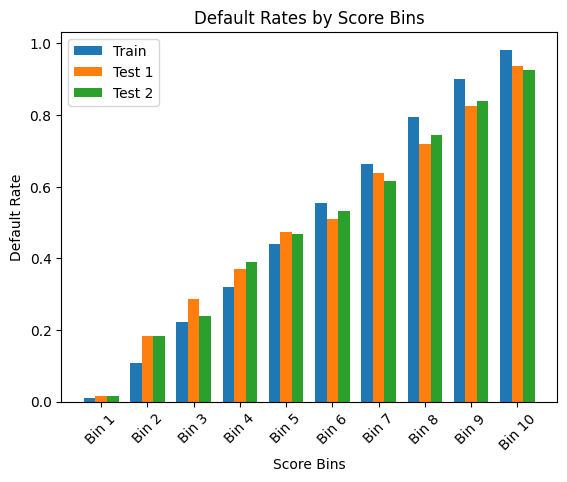

In [ ]:
# Predict probabilities of default for train and test samples
train_scores = final_model_xgb.predict_proba(X_train[combined_important_features])[:, 1]
test1_scores = final_model_xgb.predict_proba(X_test_1[combined_important_features])[:, 1]
test2_scores = final_model_xgb.predict_proba(X_test_2[combined_important_features])[:, 1]

num_bins = 10
train_scores_sorted = np.sort(train_scores)
bins = np.linspace(train_scores_sorted[0], train_scores_sorted[-1], num_bins+1)

# Calculate default rates for each bin
def calc_default_rates(scores, y, bins):
    df = pd.DataFrame({'Score': scores, 'Default': y})
    df['Bin'] = pd.cut(df['Score'], bins=bins, include_lowest=True)
    default_rates = df.groupby('Bin')['Default'].mean()
    return default_rates

train_default_rates = calc_default_rates(train_scores, y_train, bins)
test1_default_rates = calc_default_rates(test1_scores, y_test_1, bins)
test2_default_rates = calc_default_rates(test2_scores, y_test_2, bins)

# Create a bar chart
bar_width = 0.25
index = np.arange(num_bins)

plt.bar(index, train_default_rates, bar_width, label='Train')
plt.bar(index + bar_width, test1_default_rates, bar_width, label='Test 1')
plt.bar(index + 2 * bar_width, test2_default_rates, bar_width, label='Test 2')

plt.xlabel('Score Bins')
plt.ylabel('Default Rate')
plt.xticks(index + bar_width, [f'Bin {i+1}' for i in range(num_bins)], rotation=45)
plt.legend()
plt.title('Default Rates by Score Bins')
plt.show()

In [ ]:
# Print bin values and default rates
print("Bins and Default Rates:")
print("Bin Range\t\tTrain\t\tTest 1\t\tTest 2")
for i in range(num_bins):
    bin_range = f"[{bins[i]:.2f}, {bins[i+1]:.2f})"
    train_rate = train_default_rates.iloc[i]
    test1_rate = test1_default_rates.iloc[i]
    test2_rate = test2_default_rates.iloc[i]
    print(f"{bin_range}\t{train_rate:.4f}\t{test1_rate:.4f}\t{test2_rate:.4f}")


Bins and Default Rates:
Bin Range		Train		Test 1		Test 2
[0.00, 0.10)	0.0091	0.0147	0.0154
[0.10, 0.20)	0.1076	0.1835	0.1841
[0.20, 0.30)	0.2227	0.2862	0.2385
[0.30, 0.40)	0.3198	0.3710	0.3896
[0.40, 0.50)	0.4390	0.4745	0.4676
[0.50, 0.60)	0.5549	0.5098	0.5308
[0.60, 0.70)	0.6640	0.6388	0.6157
[0.70, 0.80)	0.7935	0.7201	0.7436
[0.80, 0.90)	0.9002	0.8256	0.8394
[0.90, 1.00)	0.9830	0.9375	0.9267


In [ ]:
pip install shap

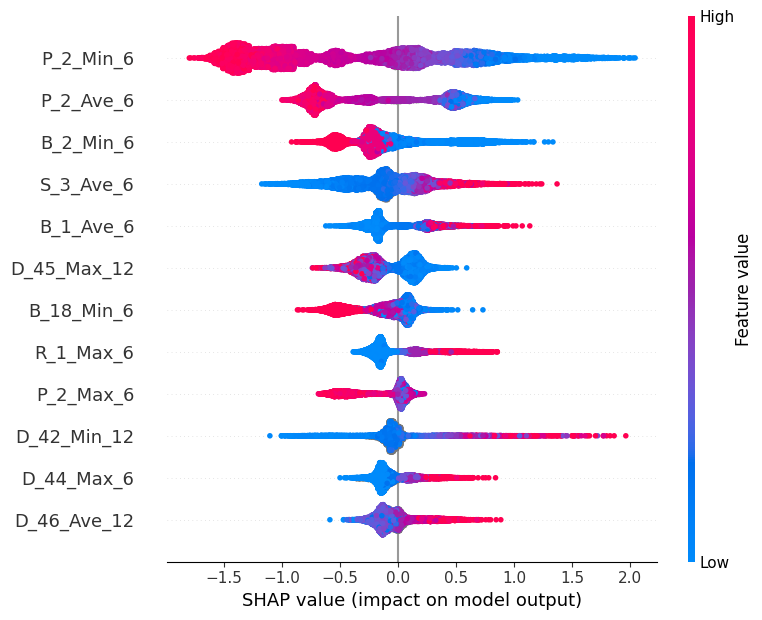

In [ ]:
import shap

# Compute SHAP values
explainer = shap.Explainer(final_model_xgb)
shap_values = explainer(X_test_2[combined_important_features])

# Create a Beeswarm plot with the top 12 features
shap.summary_plot(shap_values, X_test_2[combined_important_features], plot_type="dot", max_display=12)


In [ ]:
# Compute SHAP values for the test data
explainer = shap.Explainer(final_model_xgb)
shap_values = explainer(X_test_2[combined_important_features])

# Select a single instance (observation) from the test set
shap_value_instance = shap_values[20032]  #

# Generate the waterfall plot for the selected instance
shap.waterfall_plot(shap_value_instance)


IndexError: index 20032 is out of bounds for axis 0 with size 13768

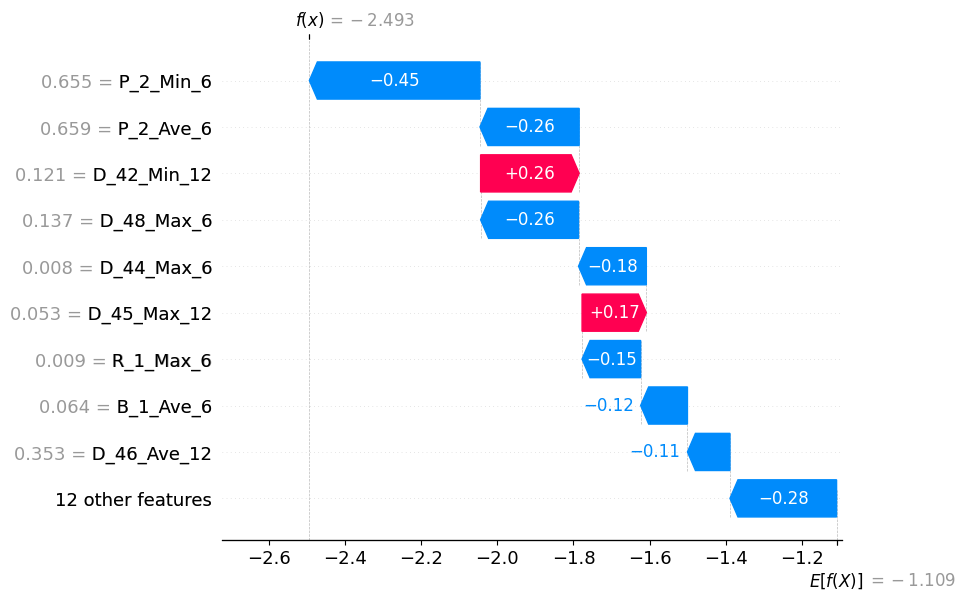

In [103]:
import shap

# Compute SHAP values for the test data
explainer = shap.Explainer(final_model_xgb)
shap_values = explainer(X_test_2[combined_important_features])

# Select the observation
obs_index = X_test_2.index.get_loc(23644)
shap_value_instance = shap_values[obs_index]

# Generate the waterfall plot for the selected instance
shap.waterfall_plot(shap_value_instance)


In [104]:
# Replace NaN values with 0 in the imputed DataFrames
X_train_nn = X_train_imputed.fillna(0)
X_test_1_nn = X_test_1.fillna(0)
X_test_2_nn = X_test_2.fillna(0)

In [105]:
# Calculate the 1st and 99th percentiles
percentiles = X_train_nn.quantile([0.01, 0.99])

# Cap and floor the values
X_train_nn = X_train_nn.clip(percentiles.iloc[0], percentiles.iloc[1], axis=1)
X_test_1_nn = X_test_1_nn.clip(percentiles.iloc[0], percentiles.iloc[1], axis=1)
X_test_2_nn = X_test_2_nn.clip(percentiles.iloc[0], percentiles.iloc[1], axis=1)


In [106]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the train data and transform both train and test data
X_train_nn = scaler.fit_transform(X_train_nn)
X_test_1_nn = scaler.transform(X_test_1_nn)
X_test_2_nn = scaler.transform(X_test_2_nn)

In [107]:
pip install tensorflow

In [108]:
import tensorflow as tf
from sklearn.metrics import roc_auc_score
import pandas as pd

results_df = pd.DataFrame(columns=['HL', 'Node', 'Activation Function', 'Dropout', 'Batch Size', 'AUC Train', 'AUC Test1', 'AUC Test2'])

# Hyperparameters
n_layers_values = [2, 4]
n_nodes_values = [4, 6]
activation_functions = ['relu', 'tanh']
dropout_rates = [0.5, 1.0]  # 50% dropout and no dropout
batch_sizes = [100, 10000]
epochs = 20

# Loop over each combination of hyperparameters
for n_layers in n_layers_values:
    for n_node in n_nodes_values:
        for activation in activation_functions:
            for dropout in dropout_rates:
                for batch_size in batch_sizes:
                    # Build and compile the model
                    model = tf.keras.models.Sequential()
                    model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))  # Input layer
                    for _ in range(n_layers):
                        model.add(tf.keras.layers.Dense(n_node, activation=activation))
                        if dropout < 1.0:
                            model.add(tf.keras.layers.Dropout(dropout))
                    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # Output layer
                    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.AUC()])

                    # Train the model
                    history = model.fit(X_train_nn, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

                    # Calculate ROC AUC scores for train, test1, and test2 sets
                    auc_train = roc_auc_score(y_train, model.predict(X_train_nn))
                    auc_test1 = roc_auc_score(y_test_1, model.predict(X_test_1_nn))
                    auc_test2 = roc_auc_score(y_test_2, model.predict(X_test_2_nn))

                    # Create a DataFrame from the results
                    result_dict = {
                        'HL': n_layers,
                        'Node': n_node,
                        'Activation Function': activation,
                        'Dropout': f"{int((1 - dropout) * 100)}%",
                        'Batch Size': batch_size,
                        'AUC Train': auc_train,
                        'AUC Test1': auc_test1,
                        'AUC Test2': auc_test2
                    }

                    result_df = pd.DataFrame([result_dict])

                    # Concatenate the DataFrame to results_df
                    results_df = pd.concat([results_df, result_df], ignore_index=True)

                    print(f"Model with {n_layers} layers, {n_node} nodes per layer, {activation} activation, "
                          f"{int((1 - dropout) * 100)}% dropout, and batch size {batch_size} finished training. "
                          f"Train AUC: {auc_train}, Test1 AUC: {auc_test1}, Test2 AUC: {auc_test2}")


2008/2008 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Model with 2 layers, 4 nodes per layer, relu activation, 50% dropout, and batch size 100 finished training. Train AUC: 0.9589093322922462, Test1 AUC: 0.9497571094320545, Test2 AUC: 0.952024159647581


<ipython-input-108-2fae0b9f485b>:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, result_df], ignore_index=True)


2008/2008 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Model with 2 layers, 4 nodes per layer, relu activation, 50% dropout, and batch size 10000 finished training. Train AUC: 0.9494815821067956, Test1 AUC: 0.9405678057923436, Test2 AUC: 0.9410015829432233
2008/2008 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Model with 2 layers, 4 nodes per layer, relu activation, 0% dropout, and batch size 100 finished training. Train AUC: 0.9657138567782918, Test1 AUC: 0.947535086476924, Test2 AUC: 0.9505177138020622
2008/2008 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Model with 2 layers, 4 nodes per layer, relu activation, 0% dropout, and batch size 10000 finished training. Train AUC: 0.9505820676174446, Test1 AUC: 0.9276253990487944, Test2 AUC: 0.9306607069995954
2008/2008 ━━━━━━━━━━━━━━

In [110]:
# Sort the results by AUC Test 1 and AUC Test 2 (descending order)
sorted_results_df_2 = results_df.sort_values(by=['AUC Test1', 'AUC Test2'], ascending=False)

# Print the sorted table
print(sorted_results_df_2)

# Save the CSV file to a temporary location
sorted_results_df_2.to_csv('sorted_results_df_2.csv', index=False)

# Download the file to your local machine
files.download('sorted_results_df_2.csv')

# Select the top row as the best model
best_model_row_2 = sorted_results_df_2.iloc[0]
print("Best model parameters:")
print(best_model_row_2)

   HL Node Activation Function Dropout Batch Size  AUC Train  AUC Test1  \
0   2    4                relu     50%        100   0.958909   0.949757   
24  4    6                relu     50%        100   0.958034   0.949442   
8   2    6                relu     50%        100   0.960048   0.948814   
2   2    4                relu      0%        100   0.965714   0.947535   
18  4    4                relu      0%        100   0.965341   0.947344   
27  4    6                relu      0%      10000   0.955712   0.945579   
12  2    6                tanh     50%        100   0.956539   0.945190   
11  2    6                relu      0%      10000   0.956128   0.943335   
4   2    4                tanh     50%        100   0.953018   0.942744   
10  2    6                relu      0%        100   0.969766   0.942571   
26  4    6                relu      0%        100   0.968733   0.941022   
30  4    6                tanh      0%        100   0.968096   0.940874   
1   2    4               

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Best model parameters:
HL                            2
Node                          4
Activation Function        relu
Dropout                     50%
Batch Size                  100
AUC Train              0.958909
AUC Test1              0.949757
AUC Test2              0.952024
Name: 0, dtype: object


In [111]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l2

optimum_params = {
    'n_layers': int(best_model_row_2['HL']),
    'n_nodes': int(best_model_row_2['Node']),
    'activation': best_model_row_2['Activation Function'],
    'dropout_rate': 1 - (int(best_model_row_2['Dropout'].strip('%')) / 100),
    'batch_size': int(best_model_row_2['Batch Size']),
}


final_model = Sequential()
final_model.add(Dense(optimum_params['n_nodes'], input_dim=X_train.shape[1], activation=optimum_params['activation'], kernel_regularizer=l2(0.01)))
for _ in range(optimum_params['n_layers'] - 1):
    final_model.add(Dense(optimum_params['n_nodes'], activation=optimum_params['activation'], kernel_regularizer=l2(0.01)))
    final_model.add(BatchNormalization())
    if optimum_params['dropout_rate'] < 1:
        final_model.add(Dropout(optimum_params['dropout_rate']))
final_model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001, clipnorm=1.0)
final_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[tf.keras.metrics.AUC()])

final_model.fit(X_train_nn, y_train, epochs=20, batch_size=optimum_params['batch_size'], verbose=1, validation_data=(X_test_1_nn, y_test_1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - auc_32: 0.8615 - loss: 0.5669 - val_auc_32: 0.9445 - val_loss: 0.4011
Epoch 2/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - auc_32: 0.9265 - loss: 0.3265 - val_auc_32: 0.9467 - val_loss: 0.2736
Epoch 3/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - auc_32: 0.9327 - loss: 0.3015 - val_auc_32: 0.9481 - val_loss: 0.2671
Epoch 4/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - auc_32: 0.9350 - loss: 0.2979 - val_auc_32: 0.9472 - val_loss: 0.2825
Epoch 5/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - auc_32: 0.9342 - loss: 0.2978 - val_auc_32: 0.9480 - val_loss: 0.3280
Epoch 6/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - auc_32: 0.9341 - loss: 0.2974 - val_auc_32: 0.9481 - val_loss: 0.2787
Epoch 7/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - auc_32: 0.9383 - loss: 0.2897 - val_auc_32: 0.9486 - val_loss: 0.2630
Epoch 8/20
643/643 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - auc_32: 0.9366 - loss: 0.2943 - val_auc_32: 0.9465 - val_loss: 0.3037
Epoch 9/

In [112]:
# Save the CSV file to a temporary location in Colab
sorted_results_df_2.to_csv('sorted_results_df_2.csv', index=False)

# Download the file to your local machine
files.download('sorted_results_df_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

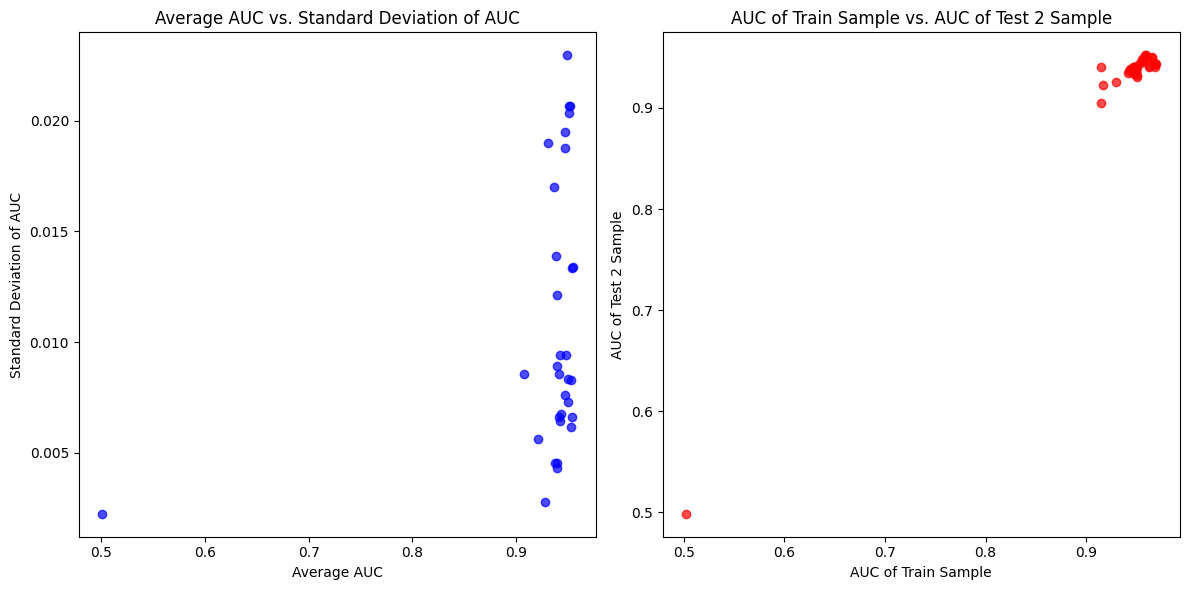

In [114]:
# Calculate average and standard deviation of AUC across three samples for each model
avg_auc = []
std_auc = []
auc_train = []
auc_test2 = []

for idx, row in sorted_results_df_2.iterrows():
    auc_train.append(row['AUC Train'])
    auc_test2.append(row['AUC Test2'])

    avg = (row['AUC Train'] + row['AUC Test1'] + row['AUC Test2']) / 3
    avg_auc.append(avg)
    std = ((row['AUC Train'] - avg)**2 + (row['AUC Test1'] - avg)**2 + (row['AUC Test2'] - avg)**2 / 3)**0.5
    std_auc.append(std)

# Create scatter plots

plt.figure(figsize=(12, 6))

# Scatter plot for Average AUC vs. Standard Deviation of AUC
plt.subplot(1, 2, 1)
plt.scatter(avg_auc, std_auc, color='b', alpha=0.7)
plt.xlabel('Average AUC')
plt.ylabel('Standard Deviation of AUC')
plt.title('Average AUC vs. Standard Deviation of AUC')

# Scatter plot for AUC of train sample vs. AUC of Test 2 sample
plt.subplot(1, 2, 2)
plt.scatter(auc_train, auc_test2, color='r', alpha=0.7)
plt.xlabel('AUC of Train Sample')
plt.ylabel('AUC of Test 2 Sample')
plt.title('AUC of Train Sample vs. AUC of Test 2 Sample')

plt.tight_layout()
plt.show()

2008/2008 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


<ipython-input-115-ff0bb77fbc96>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = df.groupby('bins')['y'].mean()


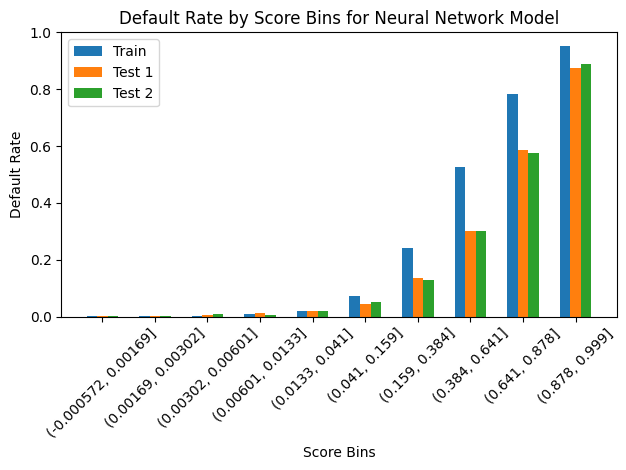

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

# Get predicted probabilities for the default class (1) for each sample
nn_probs_train = final_model.predict(X_train_nn).flatten()
nn_probs_test1 = final_model.predict(X_test_1_nn).flatten()
nn_probs_test2 = final_model.predict(X_test_2_nn).flatten()

# Define score bins based on the train sample
bins = pd.qcut(nn_probs_train, q=10, duplicates='drop').categories

# Apply the same thresholds to test samples
train_bins = pd.cut(nn_probs_train, bins=bins, labels=bins, include_lowest=True)
test1_bins = pd.cut(nn_probs_test1, bins=bins, labels=bins, include_lowest=True)
test2_bins = pd.cut(nn_probs_test2, bins=bins, labels=bins, include_lowest=True)

# Calculate default rate for each bin in each sample
def calculate_default_rates(y, bins):
    df = pd.DataFrame({'y': y, 'bins': bins})
    default_rates = df.groupby('bins')['y'].mean()
    return default_rates

train_default_rates = calculate_default_rates(y_train, train_bins)
test1_default_rates = calculate_default_rates(y_test_1, test1_bins)
test2_default_rates = calculate_default_rates(y_test_2, test2_bins)

# Create a bar chart showing the default rate for each bin across the three samples
width = 0.2  # width of the bars
x = np.arange(len(bins))  # the label locations

plt.bar(x - width, train_default_rates, width, label='Train')
plt.bar(x, test1_default_rates, width, label='Test 1')
plt.bar(x + width, test2_default_rates, width, label='Test 2')

plt.xticks(x, bins, rotation=45)
plt.xlabel('Score Bins')
plt.ylabel('Default Rate')
plt.title('Default Rate by Score Bins for Neural Network Model')
plt.legend()
plt.tight_layout()
plt.show()

In [116]:
print(best_model_row)
print("----------------------------------")
print(best_model_row_2)

Number of Trees           100.000000
Learning Rate               0.100000
Subsample                   0.800000
Percentage of Features    100.000000
Weight of Default           1.000000
AUC Train                   0.963849
AUC Test 1                  0.942324
AUC Test 2                  0.943919
Name: 45, dtype: float64
----------------------------------
HL                            2
Node                          4
Activation Function        relu
Dropout                     50%
Batch Size                  100
AUC Train              0.958909
AUC Test1              0.949757
AUC Test2              0.952024
Name: 0, dtype: object


In [117]:
# Extract AUC scores for XGBoost and Neural Network models
xgb_auc_test1 = best_model_row['AUC Test 1']
xgb_auc_test2 = best_model_row['AUC Test 2']
nn_auc_test1 = best_model_row_2['AUC Test1']
nn_auc_test2 = best_model_row_2['AUC Test2']

# Compare the average AUC scores
avg_auc_xgb = (xgb_auc_test1 + xgb_auc_test2) / 2
avg_auc_nn = (nn_auc_test1 + nn_auc_test2) / 2

print(f"Average AUC for XGBoost: {avg_auc_xgb}")
print(f"Average AUC for Neural Network: {avg_auc_nn}")

# Determine the best model
if avg_auc_xgb > avg_auc_nn:
    print("XGBoost is the best model.")
else:
    print("Neural Network is the best model.")

Average AUC for XGBoost: 0.943121241177805
Average AUC for Neural Network: 0.9508906345398178
Neural Network is the best model.


In [118]:
# Get predictions for the train dataset
xgb_predictions_train = final_model_xgb.predict(X_train_imputed[combined_important_features])

# Get predictions for the test1 dataset
xgb_predictions_test1 = final_model_xgb.predict(X_test_1[combined_important_features])

# Get predictions for the test2 dataset
xgb_predictions_test2 = final_model_xgb.predict(X_test_2[combined_important_features])

# Get predicted probabilities for the train dataset
xgb_probs_train = final_model_xgb.predict_proba(X_train_imputed[combined_important_features])

# Get predicted probabilities for the test1 dataset
xgb_probs_test1 = final_model_xgb.predict_proba(X_test_1[combined_important_features])

# Get predicted probabilities for the test2 dataset
xgb_probs_test2 = final_model_xgb.predict_proba(X_test_2[combined_important_features])

In [122]:
import pandas as pd
import numpy as np

# Define the thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Initialize lists to store default rates, portfolio revenues, and the number of applicants for the training data
default_rates_train = []
portfolio_revenues_train = []
applicant_counts_train = []

# Define start and end dates for filtering the data
start_date = pd.to_datetime('2017-11-01')
end_date = pd.to_datetime('2018-04-30')

# Filter the data to include only the last 6 months
filtered_data_train = X_train[(X_train['S_2'] >= start_date) & (X_train['S_2'] <= end_date)]

# Calculate the average balance for the filtered data
average_balance_train = filtered_data_train['B_3'].mean()

# Calculate the monthly revenue for 1 customer for the training data
monthly_revenue_train = average_balance_train * 0.02

# Calculate the expected annual revenue for the training data over the next 12 months
expected_revenue_train = monthly_revenue_train * 12

# Assuming xgb_probs_train is a NumPy array containing the predicted probabilities of the model for the training data
# Also assuming y_train is in Pandas

# Iterate through the thresholds for the training data
for threshold in thresholds:
    # Filter applicants based on the threshold for the training data
    accepted_indices_train = xgb_probs_train[:, 1] < threshold  # True for accepted, False for rejected

    # Calculate the number of applicants (both defaulted and not defaulted) for the training data
    total_applicants_train = np.sum(accepted_indices_train)

    # Calculate the number of applicants who defaulted for the training data
    defaulted_applicants_train = y_train[accepted_indices_train].sum()

    # Calculate the default rate among all applicants for the training data
    default_rate_train = defaulted_applicants_train / total_applicants_train if total_applicants_train > 0 else 0

    # Calculate the portfolio revenue for the training data
    portfolio_revenue_value_train = np.sum(expected_revenue_train * accepted_indices_train)

    # Append results to the lists for the training data
    default_rates_train.append(default_rate_train)
    portfolio_revenues_train.append(portfolio_revenue_value_train)
    applicant_counts_train.append(total_applicants_train)

# Print the results for each threshold for the training data
for i, threshold in enumerate(thresholds):
    print(f"Training Data - Threshold: {threshold:.1f}, Default Rate: {default_rates_train[i]:.2%}, Portfolio Revenue: ${portfolio_revenues_train[i]:.2f}, Number of Applicants: {applicant_counts_train[i]}")


Training Data - Threshold: 0.1, Default Rate: 0.40%, Portfolio Revenue: $383.55, Number of Applicants: 30374
Training Data - Threshold: 0.2, Default Rate: 1.20%, Portfolio Revenue: $467.17, Number of Applicants: 36996
Training Data - Threshold: 0.3, Default Rate: 2.17%, Portfolio Revenue: $513.27, Number of Applicants: 40646
Training Data - Threshold: 0.4, Default Rate: 3.62%, Portfolio Revenue: $549.32, Number of Applicants: 43501
Training Data - Threshold: 0.5, Default Rate: 5.52%, Portfolio Revenue: $583.94, Number of Applicants: 46243
Training Data - Threshold: 0.6, Default Rate: 8.10%, Portfolio Revenue: $619.43, Number of Applicants: 49053
Training Data - Threshold: 0.7, Default Rate: 11.19%, Portfolio Revenue: $656.96, Number of Applicants: 52025
Training Data - Threshold: 0.8, Default Rate: 15.14%, Portfolio Revenue: $699.06, Number of Applicants: 55359
Training Data - Threshold: 0.9, Default Rate: 20.00%, Portfolio Revenue: $748.23, Number of Applicants: 59253
Training Data - 

In [138]:
X_test_1_new, X_test_2_new, y_test_1_new, y_test_2_new = train_test_split(X_test, y_test, test_size = 0.5, random_state = 6)

In [140]:
import pandas as pd
import numpy as np

# Define the thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Initialize lists to store default rates, portfolio revenues, and the number of applicants for the test data
default_rates_test_1 = []
portfolio_revenues_test_1 = []
applicant_counts_test_1 = []

# Ensure that the 'S_2' column in X_test_1_new is in the correct datetime format
X_test_1_new['S_2'] = pd.to_datetime(X_test_1_new['S_2'], format='%Y-%m-%d')

# Define start and end dates for filtering the data
start_date = pd.to_datetime('2017-11-01')
end_date = pd.to_datetime('2018-04-30')

# Filter the data to include only the last 6 months
filtered_data_test_1 = X_test_1_new[(X_test_1_new['S_2'] >= start_date) & (X_test_1_new['S_2'] <= end_date)]

# Calculate the average balance for the filtered data
average_balance_test_1 = filtered_data_test_1['B_3'].mean()

# Calculate the monthly revenue for 1 customer for the test data
monthly_revenue_test_1 = average_balance_test_1 * 0.02

# Calculate the expected annual revenue for the test data over the next 12 months
expected_revenue_test_1 = monthly_revenue_test_1 * 12

# Iterate through the thresholds for the test data
for threshold in thresholds:
    # Filter applicants based on the threshold for the test data
    accepted_indices_test_1 = xgb_probs_test1[:, 1] < threshold  # True for accepted, False for rejected

    # Calculate the number of applicants (both defaulted and not defaulted) for the test data
    total_applicants_test_1 = np.sum(accepted_indices_test_1)

    # Calculate the number of defaulted applicants using the boolean mask on y_test_1
    defaulted_applicants_test_1 = y_test_1_new[accepted_indices_test_1].sum()

    # Calculate the default rate among all applicants for the test data
    default_rate_test_1 = defaulted_applicants_test_1 / total_applicants_test_1 if total_applicants_test_1 > 0 else 0

    # Calculate the portfolio revenue for the test data
    portfolio_revenue_value_test_1 = expected_revenue_test_1 * total_applicants_test_1

    # Append results to the lists for the test data
    default_rates_test_1.append(default_rate_test_1)
    portfolio_revenues_test_1.append(portfolio_revenue_value_test_1)
    applicant_counts_test_1.append(total_applicants_test_1)

# Print the results for each threshold for the test data
for i, threshold in enumerate(thresholds):
    print(f"Test-1 Data - Threshold: {threshold:.1f}, Default Rate: {default_rates_test_1[i]:.2%}, Portfolio Revenue: ${portfolio_revenues_test_1[i]:.2f}, Number of Applicants: {applicant_counts_test_1[i]}")



Test-1 Data - Threshold: 0.1, Default Rate: 1.47%, Portfolio Revenue: $90.49, Number of Applicants: 7813
Test-1 Data - Threshold: 0.2, Default Rate: 3.02%, Portfolio Revenue: $99.67, Number of Applicants: 8605
Test-1 Data - Threshold: 0.3, Default Rate: 4.54%, Portfolio Revenue: $105.95, Number of Applicants: 9147
Test-1 Data - Threshold: 0.4, Default Rate: 6.22%, Portfolio Revenue: $111.68, Number of Applicants: 9642
Test-1 Data - Threshold: 0.5, Default Rate: 8.42%, Portfolio Revenue: $118.05, Number of Applicants: 10192
Test-1 Data - Threshold: 0.6, Default Rate: 10.56%, Portfolio Revenue: $124.08, Number of Applicants: 10713
Test-1 Data - Threshold: 0.7, Default Rate: 13.43%, Portfolio Revenue: $131.18, Number of Applicants: 11326
Test-1 Data - Threshold: 0.8, Default Rate: 16.58%, Portfolio Revenue: $138.66, Number of Applicants: 11971
Test-1 Data - Threshold: 0.9, Default Rate: 20.68%, Portfolio Revenue: $147.81, Number of Applicants: 12761
Test-1 Data - Threshold: 1.0, Default R

In [127]:
import pandas as pd
import numpy as np

# Define the thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Initialize lists to store default rates, portfolio revenues, and the number of applicants for the test data
default_rates_test_2 = []
portfolio_revenues_test_2 = []
applicant_counts_test_2 = []

# Assuming X_test_2 is the correct DataFrame, replace X_test_2_new with X_test_2
# Ensure that the 'S_2' column in X_test_2 is in the correct datetime format
X_test_2['S_2'] = pd.to_datetime(X_test_2['S_2'])

# Convert string literals to datetime objects for Pandas
start_date = pd.to_datetime('2017-11-01')
end_date = pd.to_datetime('2018-04-30')

# Filter the data to include only the last 6 months
# Replace X_test_2_new with X_test_2
filtered_data_test_2 = X_test_2[(X_test_2['S_2'] >= start_date) & (X_test_2['S_2'] <= end_date)]

# Calculate the average balance for the filtered data
average_balance_test_2 = filtered_data_test_2['B_3'].mean()

# Calculate the monthly revenue for 1 customer for the test data
monthly_revenue_test_2 = average_balance_test_2 * 0.02

# Calculate the expected annual revenue for the test data over the next 12 months
expected_revenue_test_2 = monthly_revenue_test_2 * 12

# Assuming y_test_2 is in Pandas, replace y_test_2_new with y_test_2
# Iterate through the thresholds for the test data
for threshold in thresholds:
    # Filter applicants based on the threshold for the test data
    accepted_indices_test_2 = xgb_probs_test2[:, 1] < threshold  # True for accepted, False for rejected

    # Calculate the number of applicants (both defaulted and not defaulted) for the test data
    total_applicants_test_2 = np.sum(accepted_indices_test_2)

    # Filter y_test_2 to get defaulted applicants using the boolean mask
    # Replace y_test_2_new with y_test_2
    defaulted_applicants_test_2 = y_test_2[accepted_indices_test_2].sum()

    # Calculate the default rate among all applicants for the test data
    default_rate_test_2 = defaulted_applicants_test_2 / total_applicants_test_2 if total_applicants_test_2 > 0 else 0

    # Calculate the portfolio revenue for the test data
    portfolio_revenue_value_test_2 = expected_revenue_test_2 * total_applicants_test_2

    # Append results to the lists for the test data
    default_rates_test_2.append(default_rate_test_2)
    portfolio_revenues_test_2.append(portfolio_revenue_value_test_2)
    applicant_counts_test_2.append(total_applicants_test_2)

# Print the results for each threshold for the test data
for i, threshold in enumerate(thresholds):
    print(f"Test-2 Data - Threshold: {threshold:.1f}, Default Rate: {default_rates_test_2[i]:.2%}, Portfolio Revenue: ${portfolio_revenues_test_2[i]:.2f}, Number of Applicants: {applicant_counts_test_2[i]}")

Test-2 Data - Threshold: 0.1, Default Rate: 1.54%, Portfolio Revenue: $83.19, Number of Applicants: 7861
Test-2 Data - Threshold: 0.2, Default Rate: 3.08%, Portfolio Revenue: $91.60, Number of Applicants: 8656
Test-2 Data - Threshold: 0.3, Default Rate: 4.27%, Portfolio Revenue: $97.16, Number of Applicants: 9181
Test-2 Data - Threshold: 0.4, Default Rate: 6.05%, Portfolio Revenue: $102.43, Number of Applicants: 9679
Test-2 Data - Threshold: 0.5, Default Rate: 8.15%, Portfolio Revenue: $107.98, Number of Applicants: 10204
Test-2 Data - Threshold: 0.6, Default Rate: 10.35%, Portfolio Revenue: $113.58, Number of Applicants: 10733
Test-2 Data - Threshold: 0.7, Default Rate: 12.92%, Portfolio Revenue: $119.50, Number of Applicants: 11292
Test-2 Data - Threshold: 0.8, Default Rate: 16.35%, Portfolio Revenue: $126.60, Number of Applicants: 11963
Test-2 Data - Threshold: 0.9, Default Rate: 20.48%, Portfolio Revenue: $134.79, Number of Applicants: 12737
Test-2 Data - Threshold: 1.0, Default Ra